<a href="https://colab.research.google.com/github/tusharbansal22/Tensorflow-Notebooks/blob/main/Linear_Regression_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-01-23 15:52:43--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-01-23 15:52:43 (44.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
data=pd.read_csv('moore.csv',header=None).to_numpy()

In [5]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [6]:
X=data[:,0].reshape(-1,1)
Y=data[:,1]

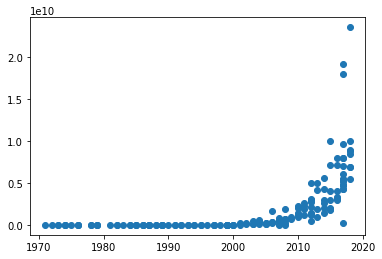

In [7]:
plt.scatter(X,Y);

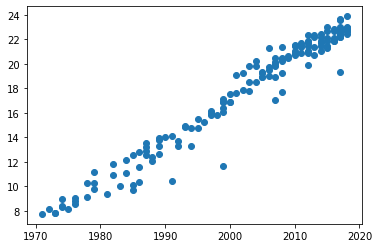

In [8]:
Y=np.log(Y)
plt.scatter(X,Y)

In [9]:
X=X-X.mean()

In [10]:
model=tf.keras.models.Sequential(
    [tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)]
)

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse',
)

In [12]:
def schedule(epoch, lr):
  if epoch>=50:
     return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [14]:
r= model.fit(X,Y,epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 488.2142 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 396.0021 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 290.7985 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 235.4502 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 183.5429 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 135.2477 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 52ms/step - loss: 102.5460 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 74.2132 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 54.4494 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 38.6562 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - loss:

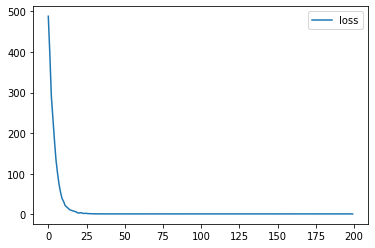

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [16]:
model.layers

In [17]:
model.layers[0].get_weights()

[array([[0.3396166]], dtype=float32), array([17.756302], dtype=float32)]

In [18]:
a= model.layers[0].get_weights()[0][0,0]

In [19]:
print("Time to double:", np.log(2)/a)

Time to double: 2.040969691403995


In [21]:
 X=X.flatten()
 denominator= X.dot(X)- X.mean()*X.sum()
 a=(X.dot(Y)-Y.mean()*X.sum())/denominator
 b=(Y.mean( )*X.dot(X)-X.mean()*X.dot(Y))/denominator
 print(a,b)

0.341682487387313 17.764939393631764


In [22]:
print("Time to double:", np.log(2)/a)

Time to double: 2.0286295205239204


## Part 2 : Making Predictions

6/6 [==============================] - 0s 1ms/step


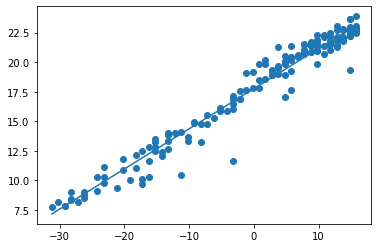

In [23]:
Yhat=model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

In [25]:
w,b = model.layers[0].get_weights()
X=X.reshape(-1,1)
Yhat2=(X.dot(w)+b).flatten()
np.allclose(Yhat,Yhat2)

True